In [4]:
import numpy as np
import pandas as pd
from scipy import stats

### Задача 1
 
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.



__Доверительный интервал__ — это интервал, который с некоторой уверенностью (заданной заранее) содержит значение оцениваемого параметра.



In [3]:
n = 256
p = 0.95
mean = 80
std = 16

n, mean, std, p

(256, 80, 16, 0.95)

<center>
    <div style="width: 350px;border:1px solid black;">
        $P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$
    </div>
</center>

Нужные нам квантили найдём с помощью `scipy`:

In [17]:

alpha = 1 - p

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

Итак, доверительный интервал:

In [18]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(78.04003601545995, 81.95996398454005)

### Задача 2
 

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. 
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? 
2. Найдите P-значение для данного теста.

Итак, нам нужно проверить Н0, что мат.ожидание = 200, при уровене значимости 1%

In [19]:
m = 200

alpha = 0.01


In [20]:
boxes = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

Известно, что их веса распределены нормально:

In [21]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.95996) \cup (1.95996, \infty)$$

In [23]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

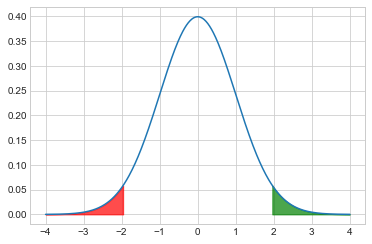

In [31]:
ox = np.linspace(-4, 4, 500)
oy = stats.norm.pdf(ox)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.norm.pdf(ox_left)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.7, color='red')
plt.fill_between(ox_right, oy_right, alpha=0.7, color='green')

Так как, дисперсию случайной величины мы не знаем. В таком случае мы можем провести статистический тест, для этого взять данную статистику:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения. В нашем случае это:
$$t = \dfrac{\overline{X} - 1}{\sigma_X / \sqrt{n}}$$

In [51]:
alpha = 0.01
def statistic(boxes):
    return (boxes.mean() - 200) / (boxes.std(ddof=1) / np.sqrt(boxes.shape[0]))

Распределение этой статистики будет другое: t-распределение Стьюдента. Значит, квантили тоже придётся считать заново:

In [55]:
n = boxes.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2, n

(-3.24983554401537, 3.2498355440153697, 10)

Итак, теперь критическая область немного шире:
$$\Omega_\alpha = (-\infty, -3.2498) \cup (3.2498, \infty)$$

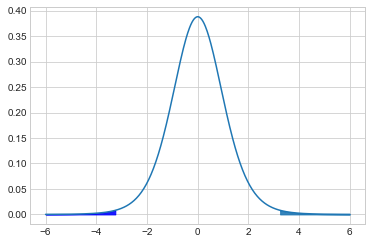

In [53]:
ox = np.linspace(-6, 6, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-6, t1, 1000)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 6, 1000)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.9, color='blue')
plt.fill_between(ox_right, oy_right, alpha=0.9, color='C0')

Итак, статистический тест:

In [54]:
t = statistic(boxes)
t

-1.0651074037450896

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

 __P-значение__ представляет собой наибольшее значение уровня значимости $\alpha$, при котором гипотезу можно принять, т.е. при котором значение статистики, посчитанной по выборке, ещё не попадает в критическую область.

Как считать P-значение:

1. Для правосторонней области $\Omega_\alpha = \left( t_{1 - \alpha}, \infty \right)$ имеем условие $t_{1 - \alpha} = S$, откуда $$P_r = 1 - F_S(S)$$

2. Для левосторонней области $\Omega_\alpha = \left( -\infty, t_\alpha \right)$, условие $t_\alpha = S$, откуда $$P_l = F_S(S)$$

3. Для двухсторонней области $\Omega_\alpha = \left( -\infty, t_{\alpha / 2} \right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$ нужна комбинация двух: $$P = 2 \cdot \min (P_l, P_r)$$

В нашем случае область двухсторонняя, так что найдём P-значение по последней формуле:

In [57]:
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.31456660352472854

Если выбранный нами уровень значимости меньше P-значения, полученного в результате теста, то гипотезу можно принять. В противном случае, гипотезу следует отвергнуть.

Для текущей задачи мы использовали уровень значимости $\alpha = 0.01$. Это меньше, чем получившееся P-значение, поэтому гипотеза принимается

### Задача 3

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.



В таком случае в качестве нулевой гипотезы $H_0$ берётся гипотеза о том, что математическое ожидание диаметра шарика равно $17$ мм.



In [111]:
m = 17
alpha = 0.025
loc = 17.5
d = 4
n = 100
scale = np.sqrt(d)
scale

2.0

In [112]:
samples = np.random.normal(loc, scale, size=n)

print(samples)

[18.10139132 16.25076616 17.29684364 19.18292484 19.72816019 17.99305998
 17.52980391 16.81473326 16.00095673 18.12498815 16.52833337 21.13199474
 15.56710264 21.91641635 13.73380544 19.06019864 16.4895946  15.748206
 17.71344601 17.15711013 17.33249688 17.3818668  16.98432176 15.53596507
 17.19605076 17.72617454 17.47779911 17.05042768 17.23794278 16.86347533
 18.39081188 18.23990866 19.63458299 19.59390798 18.90458646 18.96011614
 18.51769291 14.81952724 17.94934896 18.83698475 18.62651353 18.29277682
 14.84878156 18.48953655 19.68792104 15.63950586 15.65070523 14.45876663
 14.40013876 19.72843604 18.99586658 18.66921714 16.54467541 20.54497631
 16.20342728 18.37303081 19.05045739 17.21768389 15.31256865 17.81183097
 15.74921321 17.87264964 15.35031962 19.76563825 16.63793642 20.13549291
 15.81299055 16.50796314 16.1626386  19.01907505 16.27762805 16.89150642
 17.05952075 18.32904025 13.38561534 22.9590672  19.02921791 17.65558364
 14.30423332 20.81479719 12.78766741 16.70300945 20.3

In [113]:
s = samples.mean()
ns = np.sqrt(samples.shape[0])
s, ns

(17.534044603290443, 10.0)

In [114]:
#samples = np.random.exponential(loc, (100, 1))

#print(samples)

В нашем случае среднее квадратическое отклонение известно и равно $2$. Значит, надо использовать статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$
и при условии верности нулевой гипотезы она имеет стандартное нормальное распределение. В нашем случае:
$$Z = \dfrac{\overline{X} - 17}{2/ \sqrt{n}}$$

Эта статистика имеет стандартное нормальное распределение, т.е. нормальное распределение с параметрами $\mu = 0$, $\sigma = 1$.
Поскольку альтернативная гипотеза двухсторонняя (мат. ожидание может быть как больше, так и меньше $1$), критическая область также будет двухсторонней. Для её построения нам понадобятся квантили $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$ стандартного нормального распределения. Найдём их с помощью `scipy.stats`.

In [115]:
#t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha)

t2

1.959963984540054

Итак, критическая область:
$$\Omega_\alpha = (1.96, \infty)$$

In [116]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

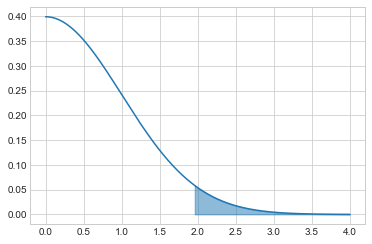

In [117]:
ox = np.linspace(0, 4, 500)
oy = stats.norm.pdf(ox)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)

plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Проводим статистический тест. Находим знаяение z-статистики по выборке (наблюдаемое значение)

In [118]:
def statistic(samples):
    return (samples.mean() - 17) / (2 / np.sqrt(samples.shape[0]))

In [119]:
z = statistic(samples)
z

2.6702230164522156

Значение попало в критическую область. Нулевая гипотеза отвергается.

### Задача 4

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В таком случае в качестве нулевой гипотезы $H_0$ берётся гипотеза о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05.


In [129]:
alpha = 0.05
variance = 0.0625

In [130]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [155]:
n = samples.shape[0]
n

24

In [156]:
sample_variance = samples.var(ddof=1)

In [157]:
print(f'несмещённая оценка дисперсии: {samples.var(ddof=1)}')

несмещённая оценка дисперсии: 0.07804495041666669


H = (n - 1) * sample_variance / variance

In [158]:
def statistic(samples):
    return (n - 1) / (variance / sample_variance)

Проводим статистический тест

In [159]:
xi = statistic(samples)
xi

28.72054175333334

In [160]:
t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
t1, t2

(11.688551922452438, 38.0756272503558)

Kритическая область:
$$\Omega_\alpha = (-\infty, 11.6885) \cup (38.0756, \infty)$$

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе.

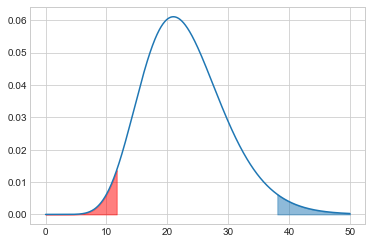

In [162]:
ox = np.linspace(0, 50, 1000)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(0, t1, 1000)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 50, 1000)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='red')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Добрый вечер!
По домашкам:
1. Дз4 можно исправить до вечера вс
2. Дз5 обновила
Задача 1 - нужно построить дов интервал для мат ожидания с неизвестной дисперсией, не забудьте, что альфа = 1 - p, альфа используем, чтобы найти квантиль для критической области. Было на занятии 
Задача 2 - продавец утверждает - это гипотеза, дальше её нужно проверить для неизвестной дисперсии и найти p-value. Было на занятии
Задача 3 - утверждается, что... - это гипотеза, проверяем её для известной дисперсии, но для ПКО, в презентации разбирали, как в таком случае выглядит критическая область
Задача 4 - для желающих погуглить
3. Дз6
Задача 1 - все аналогично тому, как было на занятии
Задача 2 - вспоминаем про дов интервалы для неизвестной дисперсии
Задача 3 - вспоминаем про дов интервалы для известной дисперсии
! Не путайте дисперсию (это сигма^2) и среднеквадратическое отклонение (сигма)
Файл практики с занятия 6 пока без доп примеров по корреляции, сделаю на днях, но с примерами тем для курсовой
